In [1]:
#filtering the data 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pck
import pandas as pd
import mpld3
mpld3.enable_notebook()

In [3]:
# provide the data folder path
fl = "C:\\Users\\bkbme\\Desktop\\Sneha_program\\CompNeuro\\data_exam.pck"

# load the data in a variable called 'A' using 'pck.load'
with open(fl, 'rb') as f:
    A = pck.load(f) 

In [4]:
# View A to know what are the data...
A

{'trial0': {'time': array([[-6.139000e-02, -6.039000e-02, -5.939000e-02, ...,  8.442053e+01,
           8.442153e+01,  8.442253e+01]]),
  'signals': array([[511.8999939 , 511.8999939 , 511.8999939 , ..., 543.79998779,
          543.79998779, 544.        ],
         [892.20001221, 892.20001221, 892.40002441, ..., 914.5       ,
          914.40002441, 914.29998779],
         [458.29998779, 458.29998779, 458.        , ..., 486.29998779,
          486.29998779, 486.29998779],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]]),
  'signalsName': ['0:time',
   '0:0:filt:none:l_x',
   '1:0:filt:none:l_y',
   '2:0:filt:none:r_x',
   '3:0:filt:none:r_y',
   '4:0:filt:none:px',
   '5:0:filt:none:py',
   '6:0

In [5]:
# load the Saccade data signals and other information (i.e., time and target) in different variables from A
time = A['trial0'] ['time']
signals = A['trial0'] ['signals'] 
target = A['trial0'] ['tar'] [0] [1] 

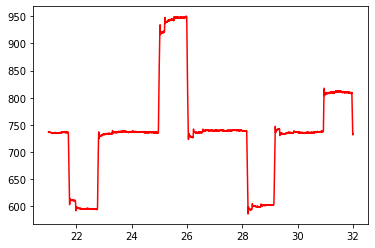

In [6]:
# To plot 21 to 32 sec data, 1st from the time variable, look what is the index for 21sec and 32 sec
# From time, 21sec (19470 time point) to 32sec (30012) signal is 12 sec data, which contain 10542 data points for 12 sec (i.e., 32-21) 
# from 'signalName', l_x and l_y signal contain in '['trial0']['signals'][0]' and ['trial0']['signals'][1]
# plot the signal from 21 to 32 sec l_x
plt.plot(time[0,19470:30012], A['trial0']['signals'][0,19470:30012],'r')

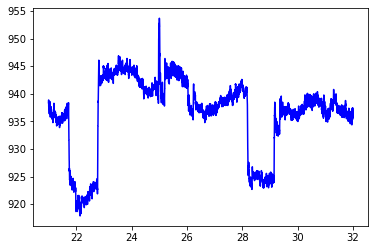

In [7]:
# plot the signal from 21 to 32 sec l_y
plt.plot(time[0,19470:30012], A['trial0']['signals'][1,19470:30012],'b')

In [8]:
from scipy.signal import firwin, lfilter
# desin a FIR filter using the window method.It's a finite impulse response filter, which have linear phase
# Low pass filter designing
ntaps = 11 
cutoff = 0.01 #0.05 
flt_mdl = firwin(ntaps, cutoff)

In [9]:
# to use filter, 1st store the cut sinal in a variable
l_x_signal = signals[0,19470:30012]
l_y_signal = signals[1,19470:30012]

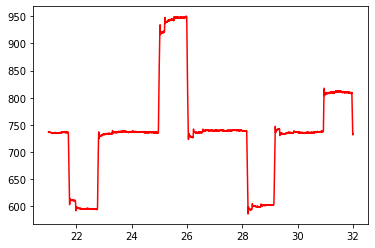

In [10]:
#plot l_x_signal
plt.plot(time[0,19470:30012], l_x_signal,'r')

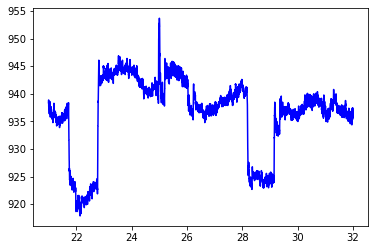

In [11]:
#plot l_y_signal
plt.plot(time[0,19470:30012], l_y_signal, 'b')

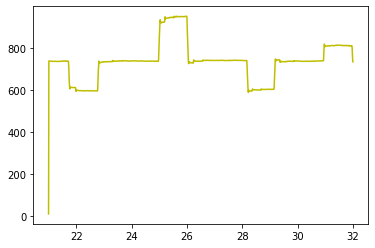

In [12]:
# use the firwin filter in the org signal (i.e.l_x_signal) and plot the filtered signal
l_x_filtered = lfilter(flt_mdl, 1.0, l_x_signal)
plt.plot(time[0,19470:30012],l_x_filtered, 'y')

In [13]:
# use the firwin filter in the org signal (i.e.l_x_signal) and plot both original and filtered signal
l_x_filtered= lfilter(flt_mdl, 1.0,l_x_signal) 
# use 'matplotlib qt' to open the plot in an intractive mode for comparisions
%matplotlib qt

plt.plot(time[0,19470:30012], l_x_signal, 'r')

plt.plot(time[0,19470:30012], l_x_filtered, 'y')
# The results plot will pop-up in a intractive mode. Please zoom the signal to visualize both original and filtered signals

In [14]:
# use the firwin filter in the l_y_signal and plot both original and filtered signal
l_y_filtered= lfilter(flt_mdl, 1.0,l_y_signal) 

plt.plot(time[0,19470:30012], l_y_signal, 'b')

plt.plot(time[0,19470:30012], l_y_filtered, 'g')
# The results plot will pop-up in a intractive mode. Please zoom the signal to visualize both original and filtered signals

In [15]:
# use another filter (i.e., medfilt) to compare firwin filter
from scipy.signal import medfilt

In [16]:
# use medfilt in the org signal (i.e.l_x_signal) and plot both original and filtered signal
l_x_filtered_med = medfilt(l_x_signal, 33)

plt.plot(time[0,19470:30012],l_x_signal, 'r')

plt.plot(time[0,19470:30012],l_x_filtered_med, 'g')

In [17]:
# use medfilt in l_y_signal and plot both original and filtered signal
l_y_filtered_med = medfilt(l_y_signal, 101)
plt.plot(time[0,19470:30012],l_y_signal, 'b')
plt.plot(time[0,19470:30012],l_y_filtered_med, 'm')

In [18]:
# use another filter (i.e., savgol_filter) to compare firwin and medfilt filter
from scipy.signal import savgol_filter

In [19]:
# use savgol_filter in the org signal (i.e.l_x_signal) and plot both original and filtered signal
l_x_filtered_savgol = savgol_filter(l_x_signal, 55, 6,)

plt.plot(time[0,19470:30012],l_x_signal, 'r')

plt.plot(time[0,19470:30012],l_x_filtered_savgol, 'c')

In [20]:
# use vert_signal in l_y_signal and plot both original and filtered signal
l_y_filtered_savgol = savgol_filter(l_y_signal, 55, 6,)
plt.plot(time[0,19470:30012],l_y_signal, 'b')
plt.plot(time[0,19470:30012],l_y_filtered_savgol, 'c')

In [21]:
# Plot original (l_x_signal) with all the filtered signal that used in three way to compare firwin, medfilt and savgol filters
plt.plot(time[0,19470:30012], l_x_signal, 'r')
plt.plot(time[0,19470:30012], l_x_filtered, 'g')
plt.plot(time[0,19470:30012], l_x_filtered_med, 'k')
plt.plot(time[0,19470:30012], l_x_filtered_savgol, 'y')

In [22]:
# Plot original (l_y_signal) with all the filtered signal that used in three way to compare firwin, medfilt and savgol filters
plt.axis([21,32,910,960])
plt.plot(time[0,19470:30012],l_y_signal, 'b')
plt.plot(time[0,19470:30012],l_y_filtered, 'r')
plt.plot(time[0,19470:30012],l_y_filtered_med, 'k')
plt.plot(time[0,19470:30012],l_y_filtered_savgol, 'c')

In [23]:
err_base= l_x_signal
err_fir= l_x_signal - l_x_filtered
err_med= l_x_signal - l_x_filtered_med
err_savgol= l_x_signal - l_x_filtered_savgol

In [24]:
errBins = np.linspace(-0.9,0.9,51) 


_=plt.hist(err_med, errBins, color='r')
_=plt.hist(err_savgol, errBins, color='g')
_=plt.hist(err_fir, errBins, color='c')

In [25]:
print(np.mean(err_fir)) 
print(np.mean(err_med)) 
print(np.mean(err_savgol)) 

0.34765582482607366
0.03154108361939476
-0.00011762158697150399


In [26]:
print(np.std(err_fir))
print(np.std(err_med)) 
print(np.std(err_savgol))

14.383679930196598
0.9617783155510331
0.44322606221110694
